In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with np.load('input/mnist.npz', allow_pickle=True) as f: 
    train_x, train_y = f['x_train'], f['y_train']
    test_x, test_y = f['x_test'], f['y_test']
print(train_x.shape, train_y.shape)

(60000, 28, 28) (60000,)


label is 4


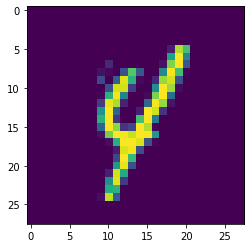

In [3]:
index = 3457
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [4]:
np.min(train_x[index]), np.max(train_x[index]), np.mean(train_x[index])

(0, 255, 19.855867346938776)

In [5]:
train_x_1 = train_x.reshape(len(train_x), -1)
print(train_x_1.shape)

test_x_1 = test_x.reshape(len(test_x), -1)
print(test_x_1.shape)

(60000, 784)
(10000, 784)


In [ ]:
class DummyClassifier(object):
    def __init__(self):
        self.name = 'Dummy'
    def fit(self, train_x, train_y):
        pass
    def predict(self, test_x):
        return np.random.randint(low=0, high=10, size=len(test_x))

In [ ]:
classifier = DummyClassifier()
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1)

In [ ]:
def accuracy(pred, gt):
    return np.sum(pred == gt)/len(gt)

In [ ]:
acc = accuracy(pred, test_y)
print(acc)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred, test_y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:2000], train_y[:2000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:3000], train_y[:3000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:10000], train_y[:10000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=20)
km.fit(train_x_1[:10000])

In [ ]:
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

#### Задача 1

Подобрать оптимальные параметры для KNeighborsClassifier.
В качестве решения необходимо отправить код подбора параметров в этом ноутбуке seminar03_knn.ipynb и параметры лучшего классификатора knn_best_params.pkl

#### Задача 2

Найти 10 эталонов, чтобы качество классификации было максимальным. (Преодолеть 70%)

В качестве решения необходимо отправить код поиска эталонов в этом ноутбуке seminar03_knn.ipynb и файл с 10 эталонами knn_10_best.npy


#### Задача 3*

Сколько эталонов нужно, чтобы преодолеть 90% точность?
Задача не является обязательной, в качестве решения необходимо предоставить код с решением

#### Ноутбук с решением необходимо сдать отправить боту @ml2021sharebot c пометкой seminar03

### Решение задачи 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setup classifier
classifier = KNeighborsClassifier()

In [ ]:
# Setup params search
params_grid = { 'n_neighbors': list(range(1, 10, 2)), \
                'weights': ['distance'], \
                'algorithm': ['kd_tree', 'ball_tree'] }
res = GridSearchCV(classifier, params_grid, cv=3, refit=True)

In [ ]:
# Fit
frac = len(train_x) // 10
res.fit(train_x_1[:frac], train_y[:frac])

In [ ]:
# Score
res.score(test_x_1, test_y)

In [ ]:
# Save best params
with open("output/knn_best_params.pkl", "wb") as f:
    pickle.dump(res.best_estimator_.get_params(), f)

### Решение задачи 2

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
# Show method
def show(samples, classes=None):
    for i in range(len(samples)):
        if classes is not None:
            print('Class', classes[i])
        plt.imshow(samples[i].reshape(28, 28))
        plt.show()

In [8]:
# Centroids
centroids = np.zeros((10, 784))
for i in range(10):
    mask = (train_y == i)
    centroids[i] = np.mean(train_x_1[mask], axis=0)

# Centroids' classes
classes = np.array(range(10))

(10, 784)
Class 0


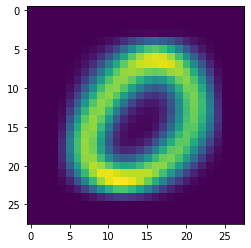

Class 1


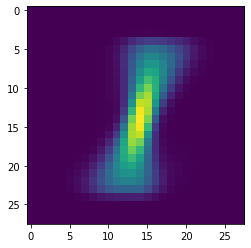

Class 2


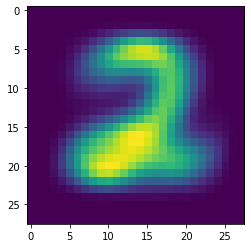

Class 3


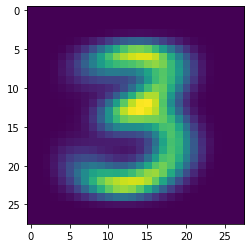

Class 4


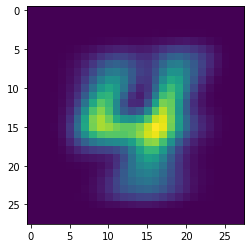

Class 5


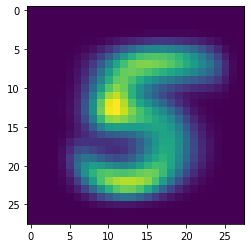

Class 6


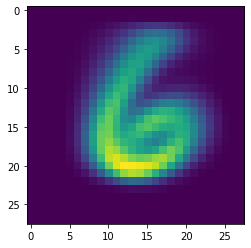

Class 7


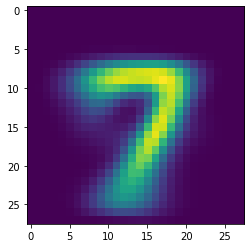

Class 8


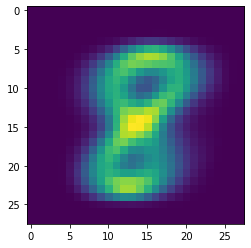

Class 9


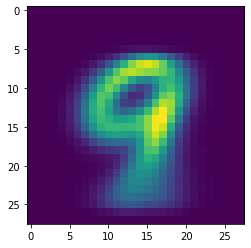

In [9]:
# Show cluster centers
print(centroids.shape)
show(centroids, classes)

In [14]:
# Setup classifier
classifier = KNeighborsClassifier(n_neighbors=1)

# Fit
classifier.fit(centroids, classes)

# Score
pred = classifier.predict(test_x_1)
acc = accuracy_score(pred, test_y)
print(acc)

0.8203


In [15]:
# Save best refs
refs_10 = centroids
np.save('output/knn_10_best', refs_10)

### Решение задачи 3

In [ ]:
# ваше решение задачи 3

# MISC

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [ ]:
# Normalize data
train_x_1 = train_x_1.astype(np.float32)
test_x_1 = test_x_1.astype(np.float32)

train_x_1 /= 255.
test_x_1 /= 255.

In [ ]:
# Training set fraction
def train_set(samples_num):
    np.random.seed(123)
    train_x_2 = np.empty((0, 784), dtype='uint8')
    train_y_2 = np.empty(0, dtype='int')
    for i in range(10):
        indices_ = np.argwhere(train_y == i).flatten()
        indices = np.random.choice(indices_, samples_num // 10)
        train_x_2 = np.concatenate((train_x_2, train_x_1[indices]))
        train_y_2 = np.concatenate((train_y_2, train_y[indices]))

    return (train_x_2, train_y_2)

# Quality measure
def score(clusters, centers):
    V = 0
    for i in range(len(centers)):
        for j in range(len(clusters[i])):
            v1, v2 = clusters[i][j], centers[i]
            norm = np.linalg.norm(v1 / np.max(v1) - v2 / np.max(v2))
            # print(norm)
            V += norm

    return V

# Assign cluster classes
def classes(predict, target):
    classes = []
    for i in range(10):
        mask = (predict == i)

        # Get number of occurrences
        count = np.bincount(target[mask], minlength=10)

        # Nullify already used classes
        count[classes] = 0

        # Get index (i.e. class) of max value
        class_ = np.argmax(count)

        # Store class of i-th cluster
        classes.append(class_)

    return classes

In [ ]:
data, target = train_x_1[:10000], train_y[:10000]  # train_set(len(train_x_1))
k, sc = 200, -1
cluster_centers = np.zeros((k, 784))
cluster_classes = np.zeros(k, dtype='int')
for i in range(100):
    # Setup
    km = KMeans(n_clusters=k)

    # Train
    km.fit(data)

    # Get clusters
    clusters = []
    for j in range(k):
        mask = (km.labels_ == j)
        clusters.append(data[mask])

    # Get score
    sc_ = score(clusters, km.cluster_centers_)

    # if sc == -1 or sc_ < sc:
    #     sc = sc_
    #     print('Best score:', sc)

    #     # Save cluster centers
    #     cluster_centers = km.cluster_centers_

    #     # Save cluster classes
    #     # cluster_classes = classes(km.labels_, target)

    #     cluster_classes = np.zeros(k, dtype='int')
    #     for i in range(k):
    #         mask = (km.labels_ == i)
    #         cluster_classes[i] = mode(target[mask])[0]

    print('Step:', i, end='\t')
    print('k:', k, end='\t')
    print('Score:', sc_, end='\n')

    # Save cluster centers
    cluster_centers = km.cluster_centers_

    # Save cluster classes
    cluster_classes = np.zeros(k, dtype='int')
    for j in range(k):
        mask = (km.labels_ == j)
        cluster_classes[j] = mode(target[mask])[0]

    # Update
    if k == 10:
        break

    k -= 20

    if k < 20:
        k = 10
    data, target = cluster_centers, cluster_classes

In [ ]:
# Show cluster centers
print(cluster_centers.shape)
show(cluster_centers, cluster_classes)

In [ ]:
# Setup classifier
classifier = KNeighborsClassifier(n_neighbors=1)

# Fit
classifier.fit(cluster_centers, cluster_classes)

# Score
pred = classifier.predict(test_x_1)
acc = accuracy_score(pred, test_y)
print(acc)